# Predicting the House Prices in Ames, Iowa
## Introduction:
Welcome to my data science project on predicting housing prices using the Ames Housing Dataset from Kaggle. This project aims to develop a model that accurately predicts the prices of residential homes in Ames, Iowa based on various features such as the size of the house, the number of rooms, and the condition of the property.

The Ames Housing Dataset is a popular dataset in the field of data science, and it contains information on over 1,400 homes sold between 2006 and 2010. The dataset is diverse, with information on various types of homes, from small apartments to large family homes. In addition, the dataset includes a wide range of features, such as the number of bedrooms and bathrooms, the size of the lot, and the type of foundation.

We will use advanced machine learning techniques to build a predictive model that can accurately estimate the value of residential homes. The model will be trained on a subset of the Ames Housing Dataset, and then validated on a separate subset to ensure that it is able to generalize well to new data.

## 1. Exploratory Data Analysis
### 1.1 Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
train_df =  pd.read_csv('C:\\Users\\Jayesh\\Dropbox\\Data Science and Machine Learning\\Datasets\\Housing Prediction\\train.csv')
test_df = pd.read_csv('C:\\Users\\Jayesh\\Dropbox\\Data Science and Machine Learning\\Datasets\\Housing Prediction\\test.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### 1.2 Combining the Train and Test Datasets

In [6]:
X_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df.SalePrice
df = pd.concat([X_train, test_df], axis=0)

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

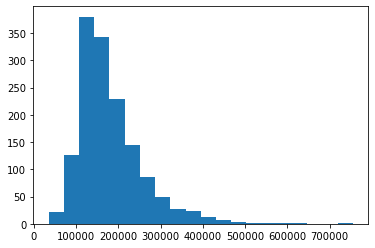

In [7]:
plt.hist(y_train, bins = 20)

### 1.3 Measuring the Skewness of Target Variable

In [8]:
print(y_train.skew())
print(y_train.kurt())

1.8828757597682129
6.536281860064529


In [9]:
numeric_dtypes = ['int64', 'float64']
numeric = []
categorical = []

In [10]:
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numeric.append(i)
    else:
        categorical.append(i)

### 1.4 Plotting Graphs of Numeric and Categorical Variables

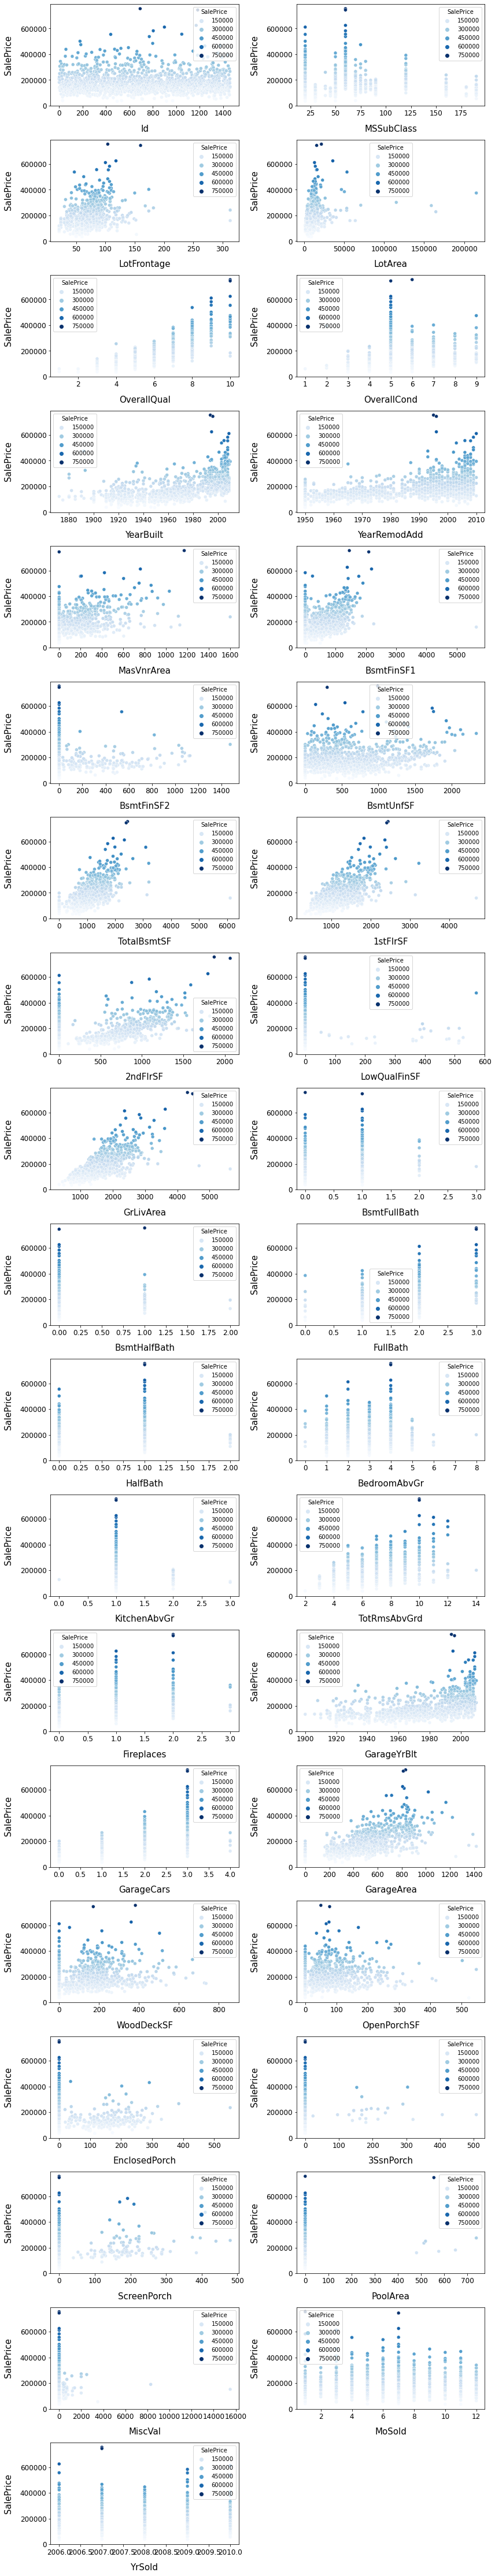

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 120))
sns.color_palette("husl", 8)
for i, feature in enumerate(list(train_df[numeric]), 1):
    plt.subplot(len(list(numeric)), 2, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train_df)
    plt.xlabel('{}'.format(feature), size=15, labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)    
plt.tight_layout()
plt.show()

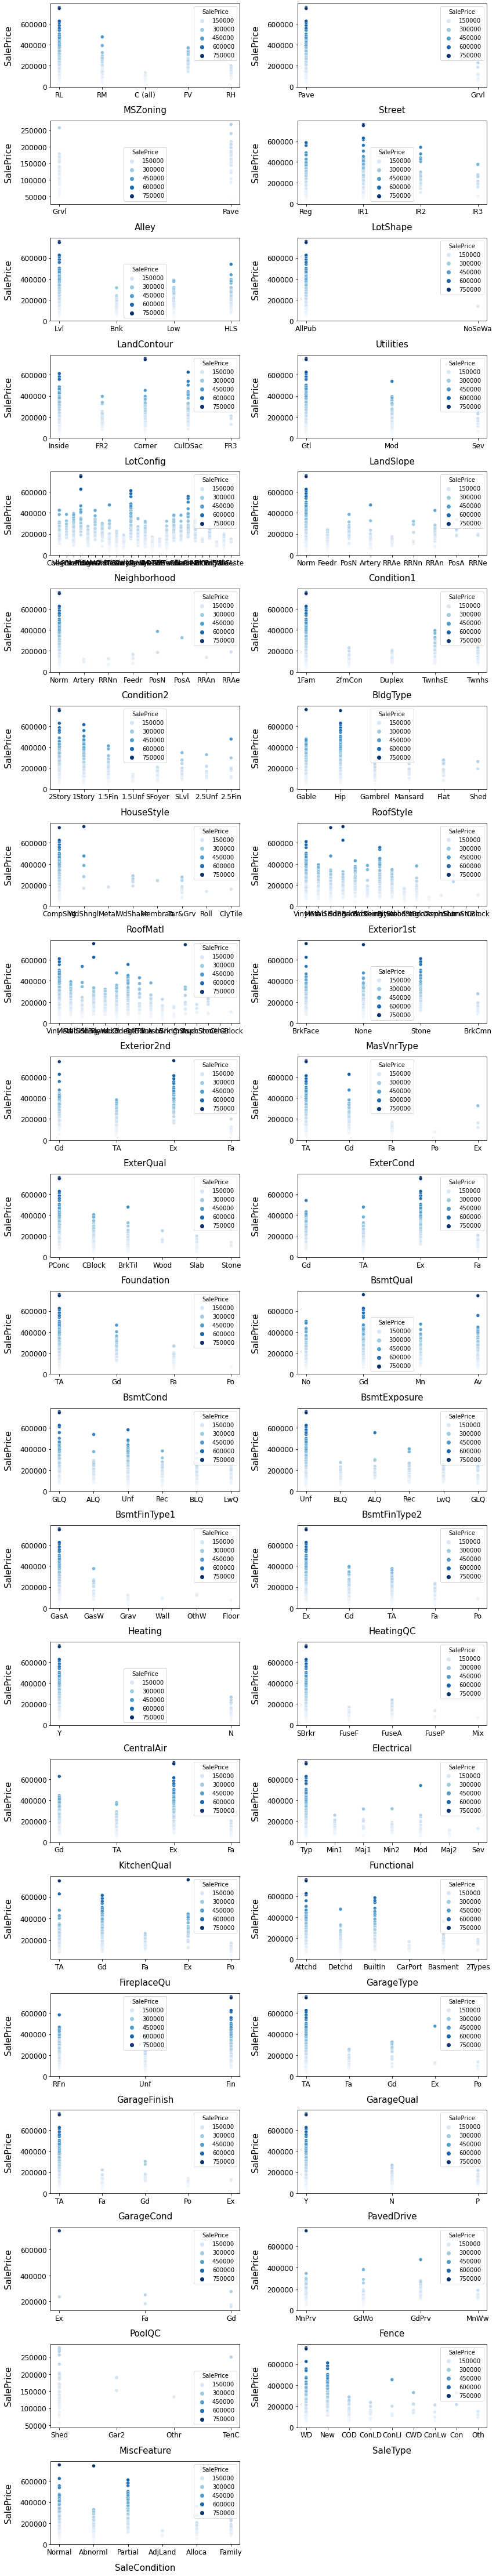

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 120))
sns.color_palette("husl", 8)
for i, feature in enumerate(list(train_df[categorical]), 1):
    plt.subplot(len(list(categorical)), 2, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train_df)
    plt.xlabel('{}'.format(feature), size=15, labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)    
plt.tight_layout()
plt.show()

### 1.5 Treating a few columns separately

In [13]:
Ids = df['Id']
df.drop(columns = ['Id'], inplace = True)

In [14]:
df['MSSubClass'].describe()

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [15]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['MoSold'] = df['MoSold'].apply(str)

In [16]:
df['MSSubClass'].describe()

count     2919
unique      16
top         20
freq      1079
Name: MSSubClass, dtype: object

In [17]:
df['AgeWhenSold'] = df['YrSold'] - df['YearBuilt']

In [18]:
df['AgeofRemod'] = df['YrSold'] - df['YearRemodAdd']

In [19]:
df['GarAgeWhenSold'] = df['YrSold'] - df['GarageYrBlt']

## 2. Data Preprocessing & Feature Engineering
### 2.1 Collinearity 

In [20]:
corr_mat = df.corr()
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

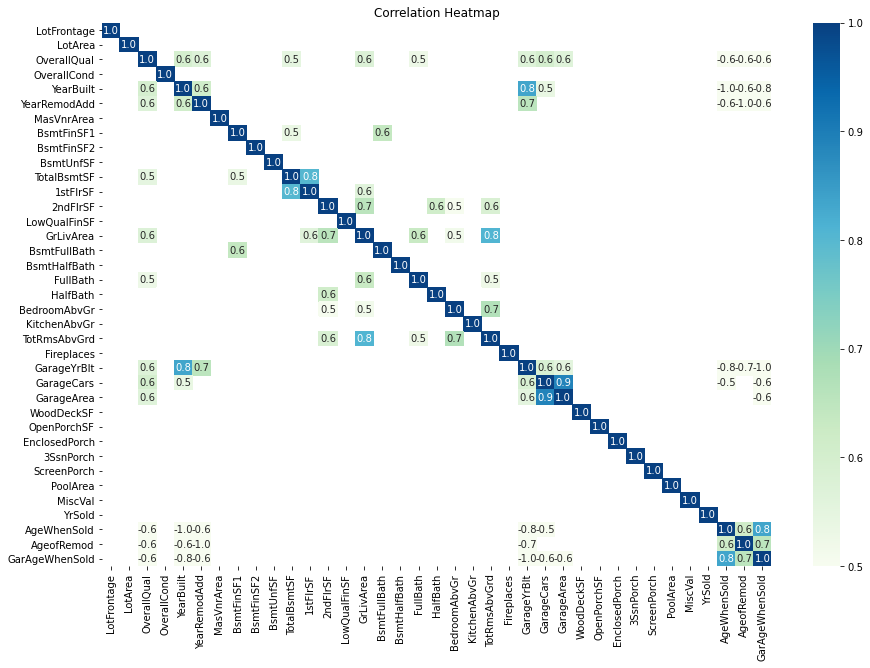

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat, annot=True, fmt='.1f', cmap='GnBu', vmin=0.5, vmax=1)
title = plt.title('Correlation Heatmap')

In [22]:
high_corr_mat.abs().unstack().sort_values(ascending = False).drop_duplicates().head(20)

LotFrontage     LotFrontage       1.000000
AgeWhenSold     YearBuilt         0.999060
GarAgeWhenSold  GarageYrBlt       0.998684
AgeofRemod      YearRemodAdd      0.998019
GarageCars      GarageArea        0.889700
AgeWhenSold     GarAgeWhenSold    0.835213
GarageYrBlt     YearBuilt         0.834812
                AgeWhenSold       0.834095
GarAgeWhenSold  YearBuilt         0.833646
GrLivArea       TotRmsAbvGrd      0.808354
1stFlrSF        TotalBsmtSF       0.801670
TotRmsAbvGrd    BedroomAbvGr      0.669737
GrLivArea       2ndFlrSF          0.655085
AgeofRemod      GarAgeWhenSold    0.653210
GarageYrBlt     AgeofRemod        0.652925
YearRemodAdd    GarageYrBlt       0.652365
                GarAgeWhenSold    0.649389
BsmtFinSF1      BsmtFullBath      0.638847
FullBath        GrLivArea         0.630286
AgeWhenSold     AgeofRemod        0.613463
dtype: float64

In [23]:
df.drop(['YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd'], axis = 1, inplace = True)

In [24]:
corr_mat = df.corr()
corr_mat.abs().unstack().sort_values(ascending = False).drop_duplicates().head(20)

LotFrontage     LotFrontage       1.000000
GarAgeWhenSold  AgeWhenSold       0.835213
TotalBsmtSF     1stFlrSF          0.801670
2ndFlrSF        GrLivArea         0.655085
GarAgeWhenSold  AgeofRemod        0.653210
BsmtFullBath    BsmtFinSF1        0.638847
FullBath        GrLivArea         0.630286
AgeofRemod      AgeWhenSold       0.613463
HalfBath        2ndFlrSF          0.611362
AgeWhenSold     OverallQual       0.597523
GrLivArea       OverallQual       0.575126
OverallQual     AgeofRemod        0.572829
                GarAgeWhenSold    0.571629
GarageArea      OverallQual       0.565122
1stFlrSF        GrLivArea         0.562538
GarageArea      GarAgeWhenSold    0.555451
TotalBsmtSF     OverallQual       0.549294
BsmtFinSF1      TotalBsmtSF       0.536467
FullBath        OverallQual       0.528483
GrLivArea       BedroomAbvGr      0.517058
dtype: float64

In [25]:
df.drop('GarAgeWhenSold', axis = 1, inplace = True)

### 2.2 Missing Values

In [26]:
missing_data_count = df.isnull().sum()
missing_data_percent = df.isnull().sum() / len(df) * 100
missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

In [27]:
missing_data

,Count,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageType,157,5.378554


In [28]:
group_1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
group_2 = ['GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
group_3 = ['Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities']

In [29]:
df[group_1] = df[group_1].fillna("None")
df[group_2] = df[group_2].fillna(0)

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[group_3] = pd.DataFrame(imputer.fit_transform(df[group_3]), index=df.index)
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mean())

In [31]:
sum(df.isnull().sum())

0

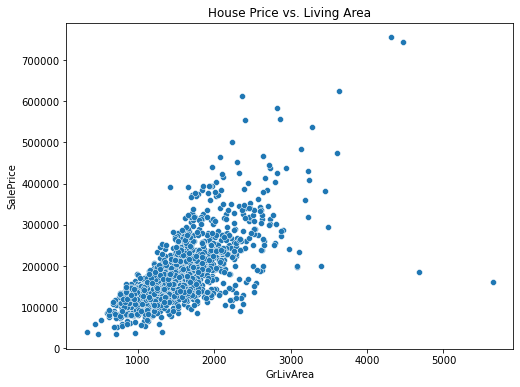

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
title = plt.title('House Price vs. Living Area')

### 2.3 Creating New Variables

In [33]:
df['totalSqFeet'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['totalBathroom'] = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['HalfBath'] + df['BsmtHalfBath'])

In [34]:
df['YrSold'] = df['YrSold'].apply(str)

### 2.4 Measuring the Skewness and Applying Log Transformation

In [35]:
from scipy.stats import skew, norm
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numeric.append(i)
skew_features = df[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
dtype: float64

In [36]:
for col in skew_index:
    df[col] = np.log(1 + df[col])

C:\Users\Jayesh\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
y_train = np.log(1 + y_train)

### 2.5 Creating Dummy Variables

In [38]:
new_df = pd.get_dummies(df, drop_first=True)

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 285 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(28), int64(4), uint8(253)
memory usage: 1.4 MB


In [40]:
new_df.replace([np.inf, -np.inf], 0, inplace=True)

### 2.6 Scaling the Data

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_df)
y_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
scaled_df = pd.DataFrame(scaled_df, columns = new_df.columns)

In [42]:
ntest = len(test_df)
X_train = scaled_df.iloc[:-ntest, :]
X_test = scaled_df.iloc[-ntest:, :]
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (1460, 285)
X_test.shape: (1459, 285)


## 3. Modelling

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X_train, y_scaled, test_size=0.25, random_state=42)

In [45]:
models = {"Ridge" : Ridge(),
          "Lasso" : Lasso(),
         "Decision Tree" : DecisionTreeRegressor(),
         "Random Forest" : RandomForestRegressor(),
         "XGBoost" : XGBRegressor(),
         "LightGBM" : LGBMRegressor(),
         "Multi Layer Perceptron" : MLPRegressor()}

In [46]:
def train_model (X_train, X_test, y_train, y_test, model, model_name, scaler):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_predict1 = scaler.inverse_transform(y_predict.reshape(-1, 1))
    y_test1 = scaler.inverse_transform(y_test.reshape(-1, 1))
    test_error = mean_squared_error(y_test1, y_predict1, squared=False)
    print("Test error = "'{}'.format(test_error)+" in " + model_name)

In [47]:
scaler = MinMaxScaler()
y_scaler = scaler.fit(y_train.values.reshape(-1,1))
for model in models:
    train_model(X_trainf, X_testf, y_trainf, y_testf, models[model], model, y_scaler)

Test error = 0.134466669262558 in Ridge
Test error = 0.4170619083943189 in Lasso
Test error = 0.20750913541364094 in Decision Tree


<ipython-input-46-0b38a33afcba>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Test error = 0.14152878837215455 in Random Forest
Test error = 0.14830436901514835 in XGBoost


C:\Users\Jayesh\anaconda3\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


Test error = 0.1331028740165222 in LightGBM


C:\Users\Jayesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Test error = 0.3032122125633919 in Multi Layer Perceptron


In [48]:
my_model = LGBMRegressor()
my_model.fit(X_train, y_scaled)

C:\Users\Jayesh\anaconda3\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


LGBMRegressor()

In [49]:
predictions = my_model.predict(X_test)
y_predict = scaler.inverse_transform(predictions.reshape(-1, 1))
y_predict = y_predict.flatten()

In [50]:
final_predictions = np.exp(y_predict) - 1
output = pd.DataFrame({'Id': test_df.index, 'SalePrice': final_predictions})
output['Id'] = output['Id'] + 1461
output.head(5)
output.to_csv('submission.csv', index=False)

## Conclusion
LightGBM Regressor gives the best result, and the submission on Kaggle ranks in the top 25% of the competition. There is a lot of scope for improvement with hyperparameter tuning and further feature engineering. 

In conclusion, our data science project on predicting housing prices using the Ames Housing Dataset has yielded valuable insights and produced an accurate predictive model. Through our analysis of the dataset, we have identified several key features that are highly predictive of home prices, such as the size of the house, the number of rooms, and the overall condition of the property.

Moving forward, there are several areas where this project could be expanded upon. For example, incorporating more advanced machine learning techniques such as neural networks or ensemble methods could potentially improve the accuracy of the model even further. Additionally, exploring other datasets on housing prices from different regions could provide valuable insights into the factors that drive home values in different markets.